In [5]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

import pingouin as pg
import researchpy
%matplotlib inline

#讀入資料
df_train = pd.read_csv('HWData/Titanic_train.csv')
df_train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#把 Survived 變成離散型變數 Survived_cate
df_train['Survived_cate'] = df_train['Survived'].astype('bool')

#Q1計算 Sex 和 Survived 是否有相關性
#step1: 用交叉列連表(contingency table)，來整理兩個類別型的資料
contTable = pd.crosstab(df_train['Sex'], df_train['Survived_cate'])
contTable

Survived_cate,False,True
Sex,,
female,81,233
male,468,109


In [7]:
#ste2:計算自由度
df = min(contTable.shape[0], contTable.shape[1]) - 1
df

1

In [4]:
#ste3:運用 researchpy 套件，計算出 Cramer’s V 係數
crosstab, res = researchpy.crosstab(df_train['Sex'], df_train['Survived_cate'], test='chi-square')
print("Cramer's value is",res.loc[2,'results'])

#df =1, Cramer's V = 0.5434, 相關性的強度為large

Cramer's value is 0.5434


In [8]:
#Q2- 計算 Age 和 Survived 是否有相關性
#step1- 計算aov
aov = pg.anova(dv='Age', between='Survived_cate', data=df_train, detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,Survived_cate,897.187582,1,897.187582,4.271195,0.039125,0.005963
1,Within,149559.448362,712,210.055405,NaN,NaN,NaN


In [9]:
#step2- 計算Eta Squared (η2) 
etaSq = aov.SS[0] / (aov.SS[0] + aov.SS[1])
etaSq
#etaSq = 0.005 < .01, 相關性的強度為Negligible

0.0059630974469252

0.13551585352705103


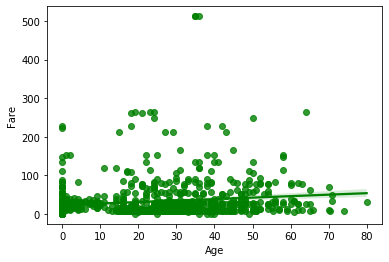

In [12]:
#Q3- 計算 Age 和 Fare 是否有相關性
df_train['Fare'] = np.nan_to_num(df_train['Fare'])
df_train['Age'] = np.nan_to_num(df_train['Age'])

corr, _ = stats.pearsonr(df_train['Fare'], df_train['Age'])
print(corr)

#用圖形判斷
g = sns.regplot(x='Age', y='Fare', color='g', data = df_train)

#corr = 0.1355, Age和Fare為低度線性相關